# Análise para detecção de câncer de mama ♋

## Objetivo

Este projeto realiza uma Análise Exploratória de Dados (EDA) no dataset de câncer de mama, que contém características clínicas (como tamanho do tumor, textura e simetria) e diagnósticos (benigno ou maligno). O objetivo é explorar as distribuições dessas variáveis, identificar padrões e analisar suas relações com o diagnóstico, gerando insights que possam destacar fatores relevantes pra detecção da doença e preparar uma base pra futuros modelos preditivos.

## 0. Importando bibliotecas 📚

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.set_option('display.max_columns', 40) # Configurando uma visualização máxima de 40 colunas para essa analise de dados

## 1. Entendendo os dados 🤔

In [7]:
# Lendo arquivo
df = pd.read_csv("breastcancer.csv")

In [8]:
# Verificando dimensões
df.shape

(569, 33)

In [9]:
# Observando dados
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


As colunas do dataset possuem sufixos que indicam tipos específicos de medições derivadas das características dos núcleos celulares em imagens de biópsia: `_mean` (média), `_se` (erro padrão) e `_worst` (média dos três valores mais extremos). 

Isso sugere alta multicolinearidade, já que essas variáveis — como `radius_mean`, `radius_se` e `radius_worst` — derivam da mesma base e tendem a variar de forma semelhante. 

Embora estejamos focados em análise exploratória, essa característica exige atenção especial em futuras preparações pra Machine Learning, onde multicolinearidade pode impactar os modelos.

In [11]:
# Observando tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

A partir do `df.info()`, já podemos observar algumas características do dataset:  

1. Quase todas as colunas são numéricas, representando medições como `radius_mean` e `texture_se`.  
2. A única coluna não numérica é `diagnosis`, que deve variar entre Benigno (B) e Maligno (M), indicando o alvo da análise.  
3. Exceto por uma coluna, não há valores ausentes, sugerindo um dataset bem preenchido.  

Como a maioria dos dados é numérica, o método `describe()` será especialmente útil pra explorar as distribuições e padrões iniciais, fornecendo uma base sólida pra nossa análise exploratória.

In [13]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


A análise preliminar com `describe()` revela que as dimensões das variáveis — como `radius_mean`, `texture_worst` e outras — apresentam magnitudes muito discrepantes, o que deve ser considerado em futuros modelos de Machine Learning pra garantir uma escala consistente. 

A coluna `id` não agrega valor à análise exploratória e pode ser removida posteriormente. Da mesma forma, `Unnamed: 32` contém apenas valores nulos, sendo candidata à exclusão. 

Antes de tratar os dados, vamos listar todas as colunas pra decidir quais manter ou ajustar na próxima etapa.

In [15]:
# visualizando nome de todas colunas
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## 2. Preparando Dados 👷‍♂️

Então vamos listar os passos para preparação de dados:

1. Remover o `id`, não é relevante para a análise
2. Remover `Unnamed: 32` não possui valores
3. Manter apenas as colunas que representam a média, vai facilitar a análise de dados

Como todos os passos envolvem remoção de colunas podemos fazer de uma única vez:

In [18]:
# Mantendo apenas as colunas de média

df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [19]:
# Renomeando para facilitar a análise

df = df.rename(columns = {'diagnosis':'Diagnosis','radius_mean': 'Radius', 
                     'texture_mean': 'Texture', 
                     'perimeter_mean': 'Perimeter',
                     'area_mean': 'Area', 
                     'smoothness_mean': 'Smoothness', 
                     'compactness_mean': 'Compactness', 
                     'concavity_mean': 'Concavity',
                     'concave points_mean': 'Concave_Points',
                     'symmetry_mean': 'Symmetry',
                     'fractal_dimension_mean': 'Fractal_Dimension'})

df.head(10)

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_Points,Symmetry,Fractal_Dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


Perfeito! Agora ficou muito mais fácil a visualização e entendimento dos dados. Agora precisamos transformar a variável `Diagnosis` em algo palpável:

In [21]:
# Transformando em string com número para converter no próximo passo
df['Diagnosis'] = df['Diagnosis'].replace({'M': '1', 'B': '0'})

In [22]:
# Transformando o Diagnóstico em valor numérico para ajudar na visualização
pd.to_numeric(df['Diagnosis'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          569 non-null    object 
 1   Radius             569 non-null    float64
 2   Texture            569 non-null    float64
 3   Perimeter          569 non-null    float64
 4   Area               569 non-null    float64
 5   Smoothness         569 non-null    float64
 6   Compactness        569 non-null    float64
 7   Concavity          569 non-null    float64
 8   Concave_Points     569 non-null    float64
 9   Symmetry           569 non-null    float64
 10  Fractal_Dimension  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


## 3. Compreensão das Variáveis ☯️

Diversas métricas relacionadas à classificação de tumores — como `Area`, `Perimeter` e `Radius` — estão interligadas, sugerindo fortes correlações entre elas. 

Essa redundância pode gerar ruído e impactar o desempenho de modelos de Machine Learning, um aspecto importante a ser considerado em análises futuras. 

Para entender melhor o papel dessas variáveis no diagnóstico de câncer, vamos analisar a distribuição de algumas que parecem mais relevantes, como `Area` e `Compactness`.

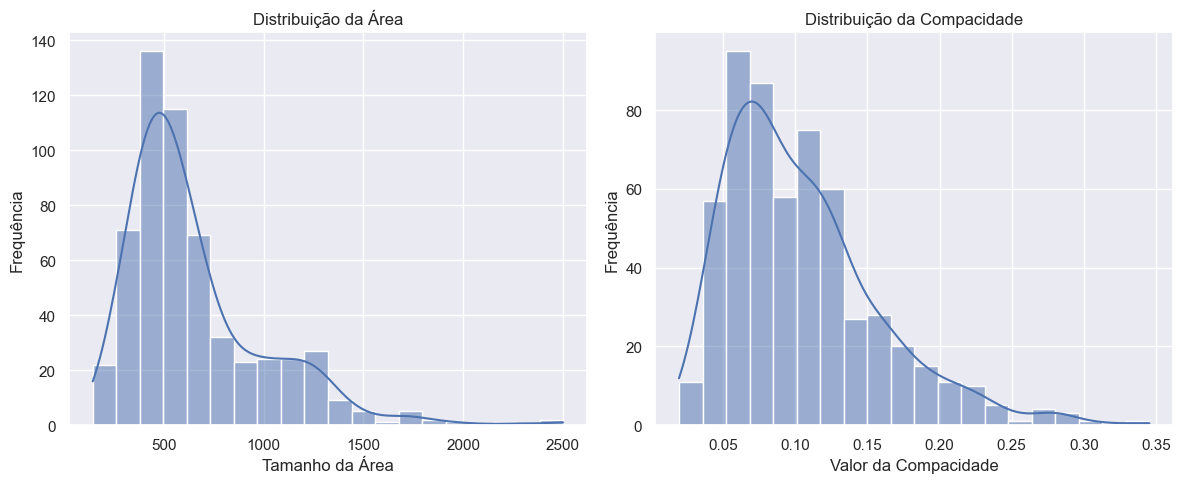

In [25]:
# Criando as visualizações lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Área
sns.histplot(df['Area'], bins=20, kde=True, ax=ax1)
ax1.set_title("Distribuição da Área")
ax1.set_xlabel("Tamanho da Área")
ax1.set_ylabel("Frequência")

# Compacidade
sns.histplot(df['Compactness'], bins=20, kde=True, ax=ax2)
ax2.set_title("Distribuição da Compacidade")
ax2.set_xlabel("Valor da Compacidade")
ax2.set_ylabel("Frequência")

# Ajustando para não sobrepor
plt.tight_layout()
plt.show()

Ao visualizar os histogramas de `Area` e `Compactness`, notamos distribuições semelhantes, reminiscentes de uma distribuição F: um crescimento abrupto no início seguido por caudas longas à direita. 

Isso indica que ambas as variáveis têm valores concentrados em faixas menores, com poucos casos extremos (ex.: tumores maiores ou mais compactos). 

A semelhança sugere que `Area` e `Compactness` podem compartilhar uma relação comparável com a variável dependente (`diagnosis`), possivelmente refletindo características tumorais correlacionadas. 

Vamos explorar isso com correlações e gráficos adicionais.

## 4. Relação de Variáveis 🤝

É comum supor que tumores maiores tenham maior probabilidade de serem malignos. Vamos testar essa hipótese inicial analisando a relação entre o tamanho do tumor — como `Area` — e o diagnóstico (`Diagnosis`), pra verificar se essa intuição se confirma nos dados.

<Axes: xlabel='Area', ylabel='Diagnosis'>

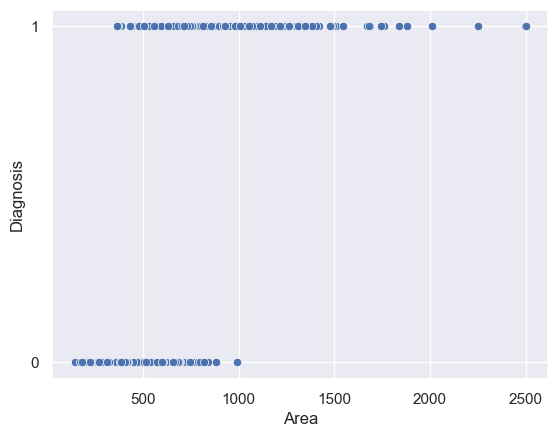

In [29]:
sns.scatterplot(x = 'Area', y = 'Diagnosis', data = df)

Embora alguns tumores pequenos sejam malignos, a maioria dos casos malignos apresenta áreas maiores. 

Isso sugere que a probabilidade de um tumor ser maligno pode aumentar com o crescimento da sua área (`Area`). Para explorar mais a fundo essas relações e confirmar padrões, vamos analisar as correlações entre todas as variáveis usando um heatmap.

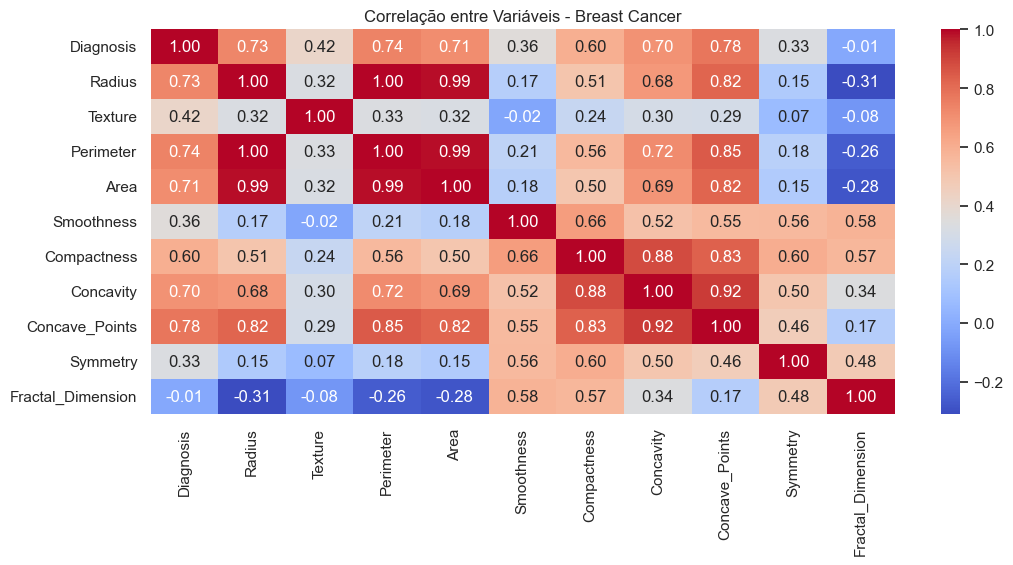

In [31]:
# Correlacionando variáveis
corr = df.corr()

# Heatmap
plt.figure(figsize = (12,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlação entre Variáveis - Breast Cancer")
plt.show()

Conforme observado anteriormente, várias variáveis apresentam alta correlação entre si. Grande parte dessa correlação elevada ocorre porque características como `Radius`, `Perimeter` e `Area` derivam de fórmulas matemáticas inter-relacionadas (ex.: perímetro e área dependem do raio). 

O mesmo se aplica a `Concavity`, `Concave` e `Symmetry`, que compartilham propriedades geométricas ou estruturais dos núcleos celulares. 

Essas redundâncias reforçam a necessidade de atenção ao interpretar os dados.

## 5. Gerando Insights 🔬

A alta correlação entre variáveis como `Radius`, `Area` e outras indica multicolinearidade significativa. 

Isso exige um cuidado aprofundado na análise exploratória, pois insights baseados em variáveis redundantes podem conter vieses ou superestimar relações com `Diagnosis`. 

Pra uma análise mais robusta, seria necessário reduzir essa redundância, mas, como o foco é exploração, anotamos isso como um ponto de atenção pra futuros passos, como Machine Learning.

Entendemos a relação entre as variáveis, mas pode ser mais interessante observar algumas variávels independentes específicas e sua relação com a variável dependente. 

Para isso vamos escolher as que podem nos trazer mais resultado:

In [36]:
# Conferindo colunas

df.columns

Index(['Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
       'Compactness', 'Concavity', 'Concave_Points', 'Symmetry',
       'Fractal_Dimension'],
      dtype='object')

Vamos seguir com: `Area`, `Compactness`, `Radius`, `Concavity` e `Concave_Points` já que podemos verificar a relação com o resultado final sem que estejam diretamente relacionadas.

Começando com dois boxplots: Area x Diagnosis e Compatness x Diagnosis.

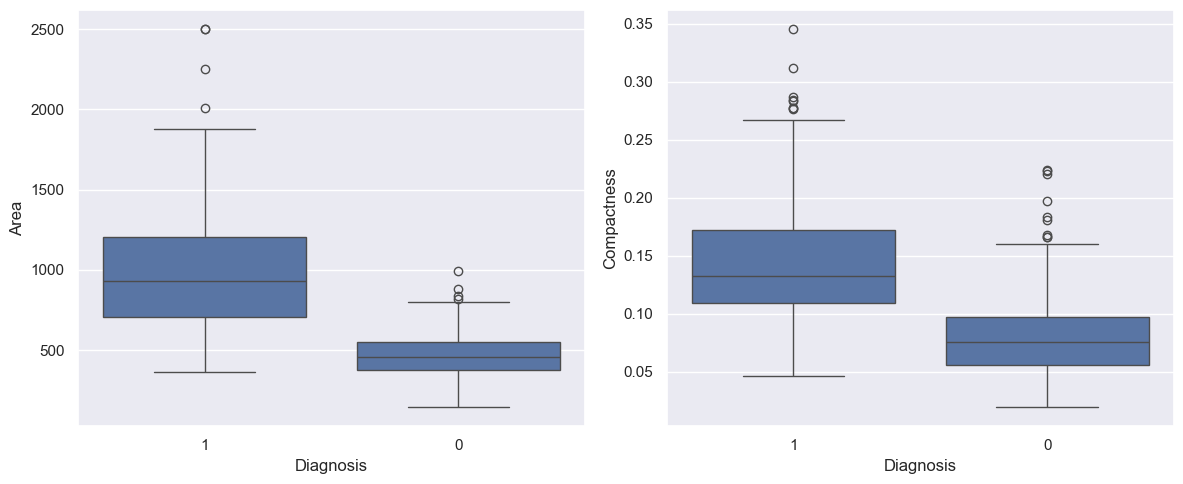

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

sns.boxplot(x = 'Diagnosis', y = 'Area', data = df, ax = ax1)

sns.boxplot(x = 'Diagnosis', y = 'Compactness', data = df, ax = ax2)

plt.tight_layout()
plt.show()

Ao analisar os boxplots de `Area` e `Compactness` em relação a `Diagnosis`, observamos que as distribuições têm comportamentos semelhantes, embora `Compactness` apresente mais outliers superiores. 

A concentração principal de cada classe (0 para benigno e 1 para maligno) é distinta, sem muita sobreposição nas medianas, mas os limites inferiores e superiores de uma classe invadem a faixa da outra. 

Isso indica que os dados estão bem agrupados por classe, com algumas exceções nos extremos. 

Vamos agora explorar essas relações em maior detalhe com um gráfico de dispersão entre `Area` e `Concavity`, separando benignos e malignos.

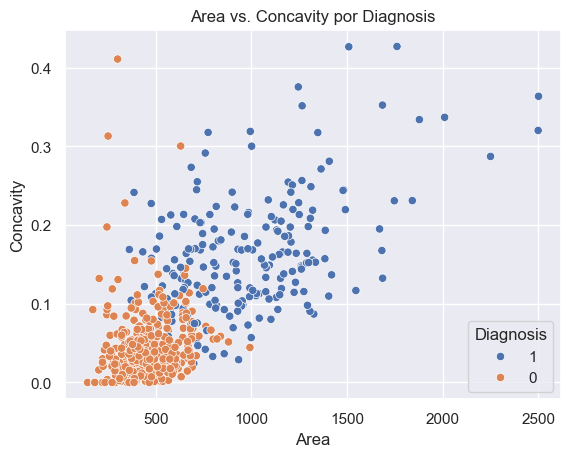

In [40]:
sns.scatterplot(x='Area', y='Concavity', hue='Diagnosis', data=df)
plt.title("Area vs. Concavity por Diagnosis")
plt.show()

O gráfico de dispersão entre `Area` e `Concavity`, com separação por `Diagnosis`, mostra que a variação de `Concavity` é menor que a de `Area`, mas valores acima de 0.15 em `Concavity` estão fortemente associados a tumores malignos. 

Há uma separação clara entre benignos e malignos na região central dos dados, mas os casos que se afastam muito dessa concentração — especialmente com `Area` alta — tendem a ser malignos, embora sem um padrão rigidamente definido fora desses limites. 

Para aprofundar essa análise, vamos visualizar `Radius` e `Concave_Points` em um gráfico de dispersão, mantendo a distinção por diagnóstico.

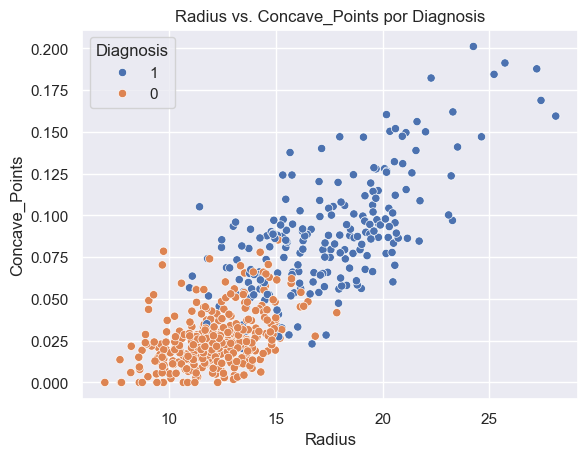

In [42]:
sns.scatterplot(x='Radius', y='Concave_Points', hue='Diagnosis', data=df)
plt.title("Radius vs. Concave_Points por Diagnosis")
plt.show()

Ao examinar a dispersão entre `Radius` e `Concave_Points`, nota-se uma distribuição mais intuitiva, com um padrão aproximadamente linear. '

Isso sugere que ambos os valores crescem proporcionalmente, indicando que tumores com maior raio e mais pontos côncavos têm maior probabilidade de serem malignos. 

Para consolidar essas observações, vamos agora visualizar as relações entre todas as variáveis selecionadas em um único gráfico.

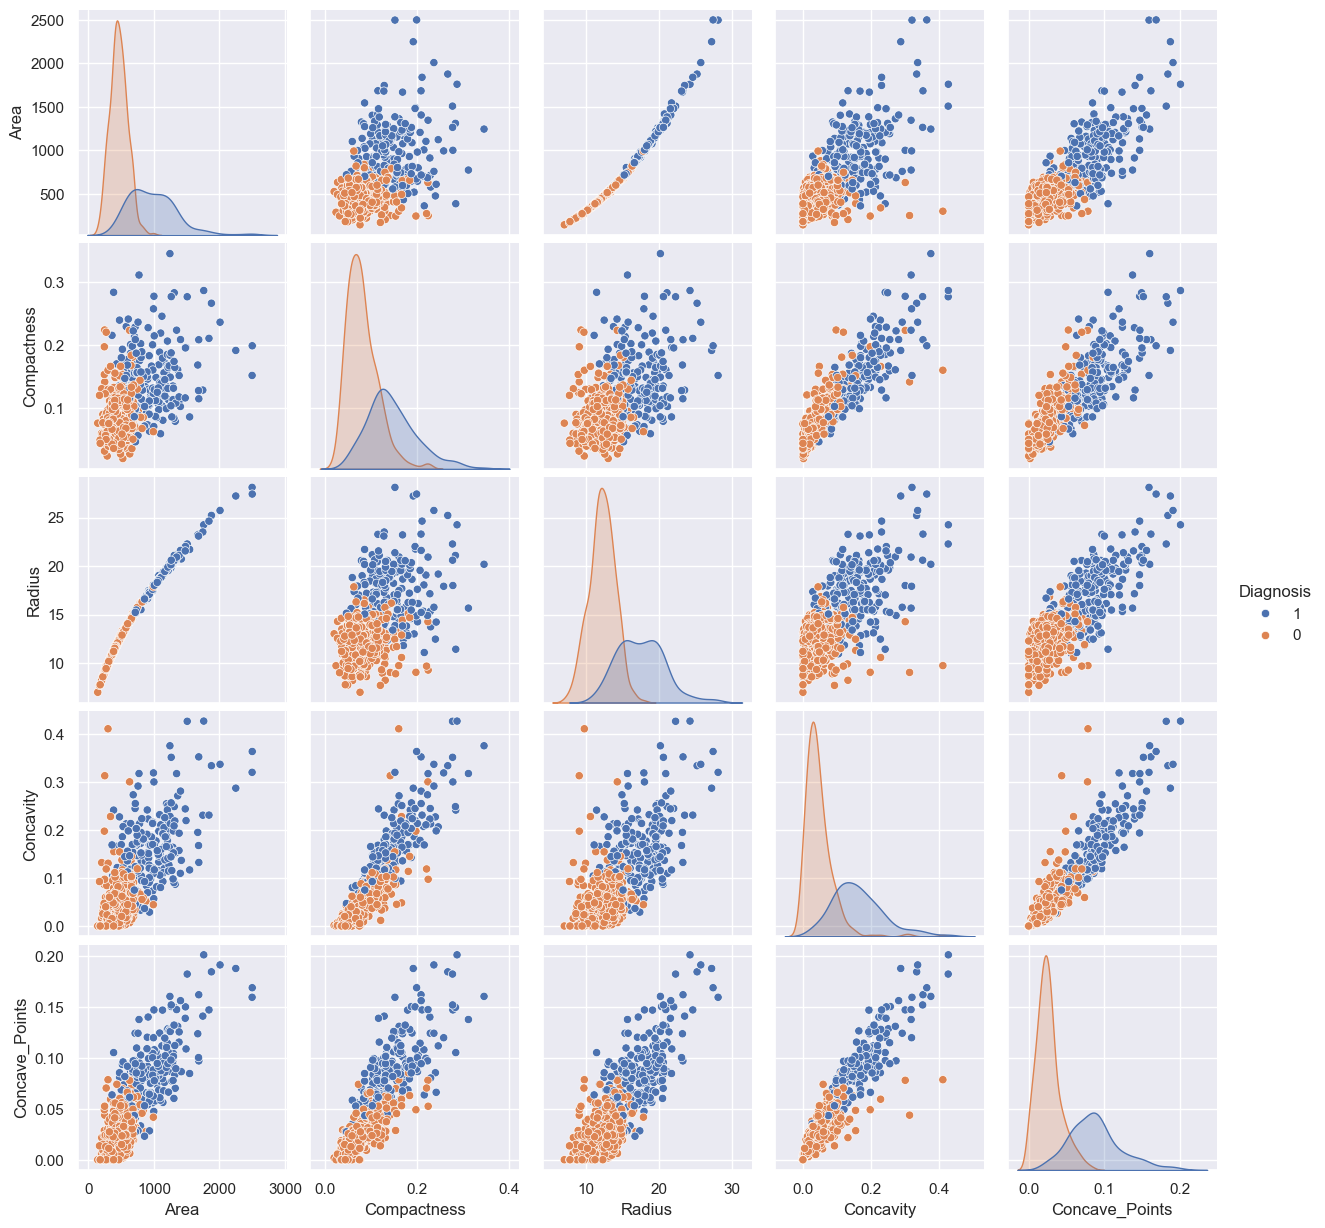

In [44]:
sns.pairplot(df, vars = ['Area', 'Compactness', 'Radius', 'Concavity', 'Concave_Points'], hue = 'Diagnosis')
plt.show()

O pairplot das variáveis selecionadas (`Area`, `Compactness`, `Radius`, `Concavity`, `Concave_Points`) revela claramente as relações identificadas e confirmadas ao longo da análise. 

As distribuições de variáveis correlacionadas, como `Area` e `Radius`, mostram uma semelhança notável, refletindo sua interdependência matemática. 

Apesar de alguma sobreposição na transição entre benignos e malignos — especialmente em valores intermediários —, a separação geral entre as classes é evidente. 

Esse comportamento distinto sugere que este dataset tem potencial pra gerar excelentes resultados em modelos de Machine Learning.

### Consolidando insights

1. Tumores malignos tendem a ter áreas maiores (`Area`), com a maioria dos casos benignos concentrada em valores menores, embora alguns tumores pequenos também sejam malignos.  
2. A compacidade (`Compactness`) segue um padrão similar ao da área, mas apresenta mais outliers superiores, sugerindo maior variabilidade em tumores malignos.  
3. Valores de concavidade (`Concavity`) acima de 0.15 estão fortemente associados a tumores malignos, indicando uma forma mais irregular como fator distintivo.  
4. Tanto o raio (`Radius`) quanto os pontos côncavos (`Concave_Points`) crescem proporcionalmente, com valores mais altos ligados a maior probabilidade de malignidade.  
5. Variáveis como `Area`, `Radius` e `Perimeter` mostram alta correlação devido à sua relação matemática, enquanto `Concavity` e `Concave_Points` também compartilham similaridades estruturais, evidenciando multicolinearidade no dataset.

Para modelos de Machine Learning envolvendo esse dataset é necessário um ajuste em multicolinearidade e verificação de ruídos, mas a análise indica que os resultados podem ser promissores.

## 6. Conclusões 📊

Esta Análise Exploratória de Dados no dataset de câncer de mama revelou padrões significativos nas características dos tumores, como a tendência de maior tamanho (`Area`, `Radius`) e irregularidade (`Concavity`, `Concave_Points`) em casos malignos, confirmada por visualizações como boxplots e scatters. 

A alta multicolinearidade entre variáveis derivadas (ex.: `Area` e `Radius`) foi um ponto de destaque, exigindo cuidado pra evitar vieses em interpretações ou futuros modelos. 

Apesar de alguma sobreposição entre benignos e malignos em valores intermediários, a separação clara das classes sugere que este dataset é uma base promissora pra Machine Learning, com potencial pra alta precisão na classificação de diagnósticos.